In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,GRU
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from time import sleep
import string
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import re
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor = 'loss', verbose = 1,patience = 8, mode = 'min')
from glob import glob
import numpy as np
from tqdm import tqdm
from keras.utils import to_categorical
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from keras.layers import Bidirectional, GlobalMaxPool1D
from sklearn.preprocessing import StandardScaler, RobustScaler
import os, re, csv, math, codecs

In [ ]:
from numpy import unique
from numpy import hstack
from numpy import vstack
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_blobs


from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt


In [ ]:

plt.style.use('ggplot')
from sklearn.metrics import *
import xgboost as xgb
import pickle
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd  
from random import random
from keras.utils import to_categorical
import numpy as np
import os
import psutil
from sklearn.model_selection import train_test_split
from keras.utils import *
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from tqdm import tqdm
import pandas as pd
from sklearn import preprocessing
import gc
gc.collect()
from time import sleep
#print(list(psutil.virtual_memory())[0:2])
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
warnings.filterwarnings("ignore")


In [ ]:
!gdown --id 1MjEK-6t0-2yMbAqSKAV5sYkbo8G47CxI&export=download

Downloading...
From: https://drive.google.com/uc?id=1MjEK-6t0-2yMbAqSKAV5sYkbo8G47CxI
To: /content/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
383MB [00:02, 179MB/s]


In [ ]:
MyList = []
for chunk in 	pd.read_csv('Friday-23-02-2018_TrafficForML_CICFlowMeter.csv',delimiter=',', chunksize=10000):
  print(len(MyList))
  chunk.fillna(chunk.mean())
  chunk[chunk==np.inf]=np.nan
  chunk.fillna(chunk.mean(), inplace=True)
  MyList.append(chunk)
df = pd.concat(MyList, axis=0)
print(df.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
(1048575, 80)


In [ ]:
df.to_pickle('DataFrame.pkl') 

In [ ]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1) 

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['Label']=df['Label'].replace({'Brute Force -Web': 'BruteForceWeb','Brute Force -XSS':'BruteForceXSS','SQL Injection':'SQLInjection'})
encoder = LabelEncoder()
original_df = df['Label'].copy()

In [ ]:
# Now apply the transformation to all the columns:
for col in df.columns:
    print(col)
    if col=="Label":
    	df[col] = encoder.fit_transform(df[col])

Dst_Port
Protocol
Timestamp
Flow_Duration
Tot_Fwd_Pkts
Tot_Bwd_Pkts
TotLen_Fwd_Pkts
TotLen_Bwd_Pkts
Fwd Pkt Len Max
Fwd_Pkt_Len_Min
Fwd_Pkt_Len_Mean
Fwd Pkt Len Std
Bwd Pkt Len Max
Bwd Pkt Len Min
Bwd_Pkt_Len_Mean
Bwd Pkt Len Std
Flow_Byts_s
Flow_Pkts_s
Flow_IAT_Mean
Flow_IAT_Std
Flow_IAT_Max
Flow_IAT_Min
Fwd_IAT_Tot
Fwd_IAT_Mean
Fwd_IAT_Std
Fwd_IAT_Max
Fwd_IAT_Min
Bwd_IAT_Tot
Bwd_IAT_Mean
Bwd_IAT_Std
Bwd_IAT_Max
Bwd_IAT_Min
Fwd PSH Flags
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
Fwd_Header_Len
Bwd Header Len
Fwd_Pkts_s
Bwd_Pkts_s
Pkt_Len_Min
Pkt Len Max
Pkt Len Mean
Pkt Len Std
Pkt Len Var
FIN Flag Cnt
SYN Flag Cnt
RST_Flag_Cnt
PSH_Flag_Cnt
ACK Flag Cnt
URG Flag Cnt
CWE Flag Count
ECE_Flag_Cnt
Down/Up Ratio
Pkt_Size_Avg
Fwd_Seg_Size_Avg
Bwd_Seg_Size_Avg
Fwd Byts/b Avg
Fwd Pkts/b Avg
Fwd Blk Rate Avg
Bwd Byts/b Avg
Bwd Pkts/b Avg
Bwd Blk Rate Avg
Subflow Fwd Pkts
Subflow_Fwd_Byts
Subflow Bwd Pkts
Subflow Bwd Byts
Init_Fwd_Win_Byts
Init_Bwd_Win_Byts
Fwd Act Data Pkts
Fwd_Seg_Size_Min
Ac

In [ ]:
y_label = df.iloc[:, -1]
X_features = df.iloc[:,4:80] #X_features
print("X_features",X_features.shape)

X_features (1048575, 76)


In [ ]:
# Scaling the features

In [ ]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)
print("X_features",X_features.shape)
# Visualize
pca = PCA()
pca_components=pca.fit_transform(X_features)
pca_variance = pca.explained_variance_
principle_df=pd.DataFrame(data=pca_components)
print("pca_components",pca_components)
print("pca_variance",pca_variance)
print("principle_df",principle_df.shape)

X_features (1048575, 76)
pca_components [[ 3.49280409e+00  1.10527999e-02 -6.70403061e-01 ... -8.80893572e-17
   9.31731639e-14  1.15824032e-14]
 [ 2.88475226e+00  3.72369962e+00  1.40567808e-01 ...  2.08983451e-16
  -7.81811979e-16 -1.65131688e-14]
 [ 2.88475287e+00  3.72369981e+00  1.40567768e-01 ... -3.53973024e-17
  -1.61967764e-15  1.35505386e-16]
 ...
 [-1.29052505e+00 -2.32655209e+00  6.56504715e-01 ...  1.12196215e-18
  -8.46126928e-19 -9.21069443e-19]
 [ 4.84647816e+00 -3.04530426e-01 -1.20621935e+00 ... -1.45141901e-18
  -2.33686532e-17 -3.24579256e-18]
 [ 1.16275835e-01 -1.18463873e+00 -6.32471219e-02 ...  7.48687671e-19
  -1.21024497e-18  6.57517466e-18]]
pca_variance [1.40651405e+01 1.02469038e+01 7.52689237e+00 4.86824842e+00
 3.73528844e+00 2.96698668e+00 2.61362981e+00 2.31498929e+00
 1.98650765e+00 1.76973292e+00 1.34738340e+00 1.25108388e+00
 1.14222350e+00 1.03865981e+00 9.78359381e-01 9.49090936e-01
 9.31568791e-01 8.36288310e-01 7.34488851e-01 6.55300724e-01
 5.342

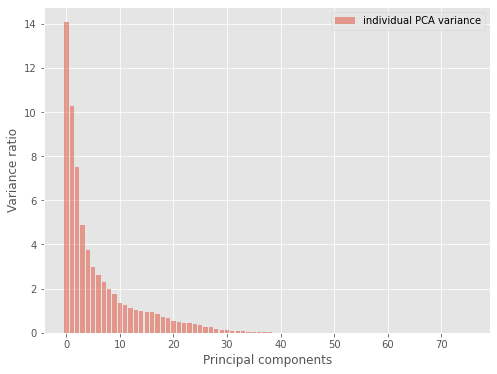

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(range(76), pca_variance, alpha=0.5, align='center', label='individual PCA variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

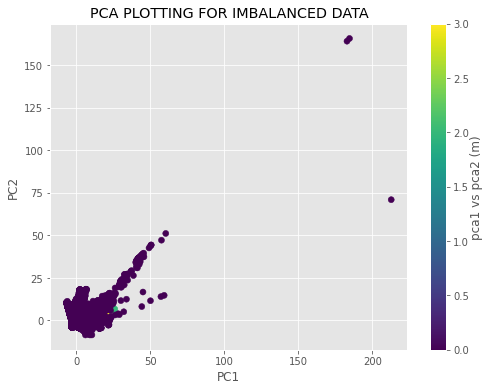

In [ ]:
pca2 = PCA(n_components=8)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1], c=df['Label'])
plt.title("PCA PLOTTING FOR IMBALANCED DATA")
plt.xlabel("PC1")
plt.ylabel("PC2")
cbar= plt.colorbar()
cbar.set_label("pca1 vs pca2 (m)", labelpad=+1)
plt.show()





In [ ]:
number_of_labels = original_df.nunique() 
# printing value 
print("number_of_labels",number_of_labels)  #4
print(original_df.unique()) #['Benign' 'Brute Force -Web' 'Brute Force -XSS' 'SQL Injection'] 
print((original_df=='Benign').sum()) #1048009
print((original_df=='BruteForceWeb').sum())  #362
print((original_df=='BruteForceXSS').sum())  #151
print((original_df=='SQLInjection').sum())     #53



number_of_labels 4
['Benign' 'BruteForceWeb' 'BruteForceXSS' 'SQLInjection']
1048009
362
151
53


In [ ]:
columns = list(df) 
print("columns",columns)
arr_labels = original_df.to_numpy()
print("arr_labels",arr_labels)
print("arr_labels",len(arr_labels)) 
print("arr_labels",arr_labels.shape) 
# Total missing values for each feature
print ("Total missing values for each feature",df.isnull().sum())
with open("missing.txt",'w') as f:
	f.write(str(df.isnull().sum()))


columns ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',

In [ ]:
print ("Any missing values?",df.isnull().values.any())

# Total number of missing values
print ("Total number of missing values",df.isnull().sum().sum())


Any missing values? False
Total number of missing values 0


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)



In [ ]:
print ("Total missing values for each feature",df.isnull().sum())
with open("missing.txt",'w') as f:
	f.write(str(df.isnull().sum()))

# Any missing values?
print ("Any missing values?",df.isnull().values.any())

# Total number of missing values
print ("Total number of missing values",df.isnull().sum().sum())

Total missing values for each feature Dst Port             0
Protocol             0
Timestamp            0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max        

In [ ]:
print("df.shape",df.shape)


df.shape (1048575, 80)


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y1 = le.fit_transform(arr_labels)

In [ ]:
encoded1=np.array(X_features)

In [ ]:
#Split Data
X_train, X_test, Y_TRAIN, Y_TEST = train_test_split(encoded1, y1, test_size=0.50, shuffle= True)
Y_TRAIN1=to_categorical(Y_TRAIN,num_classes=4)
Y_TEST1=to_categorical(Y_TEST,num_classes=4)

n_classes 4
y [0 0 0 ... 0 0 0]


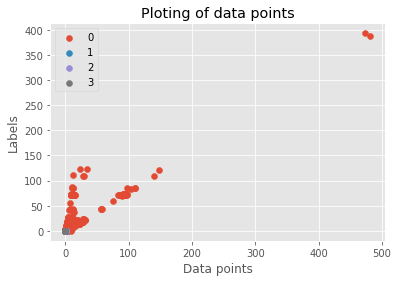

In [ ]:
# scatter plot of dataset, different color for each class
def plot_dataset(X, y):
	# create scatter plot for samples from each class
	n_classes = len(unique(y))
	print("n_classes",n_classes)
	print("y",y)
	for class_value in range(n_classes):
		# get row indexes for samples with this class
		row_ix = where(y == class_value)[0]
		# create scatter of these samples
		pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
	# show a legend
	pyplot.legend()
	plt.title("Ploting of data points")
	plt.ylabel('Labels')
	plt.xlabel('Data points')
	# show the plot
	pyplot.show()

plot_dataset(encoded1, y1)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as K

In [ ]:
print(X_train.shape)
print(X_test.shape)

input_img= Input(shape=(76,))

(524287, 76)
(524288, 76)


In [ ]:
encoded = Dense(units=76, activation='relu')(input_img)
encoded = Dense(units=100, activation='relu')(encoded)
encoded = Dense(units=50, activation='relu')(encoded)
encoded = Dense(units=25, activation='relu')(encoded)
encoded = Dense(units=12, activation='relu')(encoded)
encoded = Dense(units=6, activation='relu')(encoded)

decoded = Dense(units=12, activation='relu')(encoded)
decoded = Dense(units=25, activation='relu')(decoded)
decoded = Dense(units=50, activation='relu')(decoded)
decoded = Dense(units=100, activation='relu')(decoded)
decoded = Dense(units=200, activation='relu')(decoded)
decoded = Dense(units=76, activation='softmax')(decoded)

autoencoder=Model(input_img, decoded)

In [ ]:
encoder = Model(input_img, encoded)

In [ ]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 76)]              0         
_________________________________________________________________
dense_48 (Dense)             (None, 76)                5852      
_________________________________________________________________
dense_49 (Dense)             (None, 100)               7700      
_________________________________________________________________
dense_50 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_51 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_52 (Dense)             (None, 12)                312       
_________________________________________________________________
dense_53 (Dense)             (None, 6)                 78  

In [ ]:
encoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 76)]              0         
_________________________________________________________________
dense_48 (Dense)             (None, 76)                5852      
_________________________________________________________________
dense_49 (Dense)             (None, 100)               7700      
_________________________________________________________________
dense_50 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_51 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_52 (Dense)             (None, 12)                312       
_________________________________________________________________
dense_53 (Dense)             (None, 6)                 78  

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
#Training the autoencoder
print("[INFO] training stacked autoencoder")
autoencoder.fit(X_train, X_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))
encoder = Model(input_img, encoded)
encoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

[INFO] training stacked autoencoder
Epoch 1/30
2048/2048 [==============================] - 17s 7ms/step - loss: 0.7750 - accuracy: 0.4942 - val_loss: 0.8662 - val_accuracy: 0.7045
Epoch 2/30
2048/2048 [==============================] - 14s 7ms/step - loss: 0.7812 - accuracy: 0.5614 - val_loss: 0.8705 - val_accuracy: 0.4824
Epoch 3/30
2048/2048 [==============================] - 14s 7ms/step - loss: 0.7603 - accuracy: 0.4945 - val_loss: 0.8702 - val_accuracy: 0.5010
Epoch 4/30
2048/2048 [==============================] - 14s 7ms/step - loss: 0.7935 - accuracy: 0.5168 - val_loss: 0.8831 - val_accuracy: 0.5507
Epoch 5/30
2048/2048 [==============================] - 14s 7ms/step - loss: 0.7912 - accuracy: 0.5016 - val_loss: 0.8896 - val_accuracy: 0.5011
Epoch 6/30
2048/2048 [==============================] - 14s 7ms/step - loss: 0.7940 - accuracy: 0.4186 - val_loss: 0.8819 - val_accuracy: 0.5604
Epoch 7/30
2048/2048 [==============================] - 14s 7ms/step - loss: 0.7733 - accuracy

In [ ]:
print("[INFO] storing data from trained autoencoder")
pre_test=encoder.predict(X_test)
print(pre_test.shape)
pre_test=np.reshape(pre_test,(pre_test.shape[0],pre_test.shape[1],1))
print(pre_test.shape)


[INFO] storing data from trained autoencoder
(524288, 6)
(524288, 6, 1)


In [ ]:
pre_train=encoder.predict(X_train)
print(pre_train.shape)
pre_train=np.reshape(pre_train,(pre_train.shape[0],pre_train.shape[1],1))
print(pre_train.shape)

(524287, 6)
(524287, 6, 1)


In [ ]:
#BILSTM 
model = Sequential()

model.add(LSTM(128,input_shape=(pre_train.shape[1],pre_train.shape[2]),return_sequences=True))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Dropout(0.20))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Dropout(0.20))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Dropout(0.20))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.20))
model.add(Dense(4, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 128)            66560     
_________________________________________________________________
bidirectional (Bidirectional (None, 6, 128)            98816     
_________________________________________________________________
dropout (Dropout)            (None, 6, 128)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 6, 128)            98816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 128)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 6, 128)            98816     
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 128)            0

In [ ]:
#Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Fit
checkpoint = ModelCheckpoint("check.h5", monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint,earlystopping] 
print("[INFO] training BiLSTM network")
model.fit(pre_train, Y_TRAIN1,batch_size=64, epochs=1,shuffle=True, verbose=1,callbacks=callbacks_list,validation_data=(pre_test,Y_TEST1))


[INFO] training BiLSTM network
8192/8192 [==============================] - 666s 75ms/step - loss: 0.0131 - accuracy: 0.9994 - val_loss: 0.0052 - val_accuracy: 0.9994

Epoch 00001: loss improved from inf to 0.00619, saving model to check.h5


In [ ]:
yhat_classes = model.predict_classes(pre_test, verbose=1)
print("yhat_classes",yhat_classes.shape)

16384/16384 [==============================] - 238s 14ms/step
yhat_classes (524288,)


In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
import itertools  

In [ ]:
print('Confusion Matrix Calculation')
cm=confusion_matrix(Y_TEST, yhat_classes)
print("Confusion Matrix",cm)

Confusion Matrix Calculation
Confusion Matrix [[523998      0      0      0]
 [   193      0      0      0]
 [    70      0      0      0]
 [    27      0      0      0]]


Confusion matrix, without normalization
[[523998      0      0      0]
 [   193      0      0      0]
 [    70      0      0      0]
 [    27      0      0      0]]


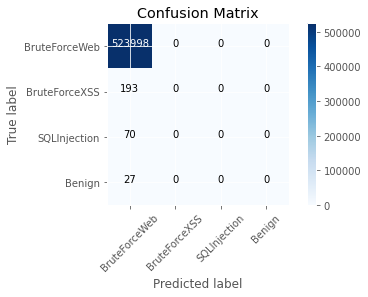

END OF CONFUSION ALGORITHM


In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
cm_plot_labels = ['BruteForceWeb','BruteForceXSS','SQLInjection','Benign']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print("END OF CONFUSION ALGORITHM") 

In [ ]:
accuracy = accuracy_score(Y_TEST, yhat_classes)
print('Testing Accuracy: %f' % accuracy)
precision = precision_score(Y_TEST, yhat_classes,average='micro')
print('Testing Precision: %f' % precision)
recall = recall_score(Y_TEST, yhat_classes,average='micro')
print('Testing Recall: %f' % recall)
f1 = f1_score(Y_TEST, yhat_classes,average='micro')
print('Testing F1 score: %f' % f1)


Testing Accuracy: 0.999447
Testing Precision: 0.999447
Testing Recall: 0.999447
Testing F1 score: 0.999447
